# Initial chronic illness data exploration and cleaning up

## Importing libraries and data

In [24]:
import pandas as pd
import numpy as np
import os

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt # for plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
from numpy import array
from matplotlib import cm

In [26]:
path = r'C:\Users\tiffk\ChronicIllness'

In [30]:
# Importing dataset
df_original = pd.read_csv(os.path.join(path, 'Data', 'Original_Data.csv'), low_memory=False, index_col = False)

## Checking out what data type and columns are in the dataset

In [33]:
df_original.dtypes

user_id             object
age                float64
sex                 object
country             object
checkin_date        object
trackable_id        object
trackable_type      object
trackable_name      object
trackable_value     object
dtype: object

In [35]:
df_original.head()

user_id   age     sex country checkin_date  \
0  QEVuQwEABlEzkh7fsBBjEe26RyIVcg==   NaN     NaN     NaN   2015-11-26   
1  QEVuQwEAWRNGnuTRqXG2996KSkTIEw==  32.0    male      US   2015-11-26   
2  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
4  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   

  trackable_id trackable_type  \
0         1069      Condition   
1         1069      Condition   
2         3168      Condition   
3         3169      Condition   
4         3170      Condition   

                                      trackable_name trackable_value  
0                                 Ulcerative colitis               0  
1                                 Ulcerative colitis               0  
2  pain in left upper arm felt like i was getting...               4  
3                            hip pain when gettin up               3  
4                                pain in hand joints               4

In [41]:
df_original.head(20)

user_id   age     sex country checkin_date  \
0   QEVuQwEABlEzkh7fsBBjEe26RyIVcg==   NaN     NaN     NaN   2015-11-26   
1   QEVuQwEAWRNGnuTRqXG2996KSkTIEw==  32.0    male      US   2015-11-26   
2   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
3   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
4   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
5   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
6   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
7   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
8   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
9   QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
10  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
11  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
12  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
13  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
14  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
15  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
16  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
17  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
18  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   
19  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==   2.0  female      CA   2017-04-28   

   trackable_id trackable_type  \
0          1069      Condition   
1          1069      Condition   
2          3168      Condition   
3          3169      Condition   
4          3170      Condition   
5          3171      Condition   
6          1356      Condition   
7          3172      Condition   
8          3173      Condition   
9          3174      Condition   
10         3175      Condition   
11         3176      Condition   
12         3177      Condition   
13         3178      Condition   
14         3179      Condition   
15          123        Symptom   
16         9363        Weather   
17         9363        Weather   
18         9363        Weather   
19         9363        Weather   

                                       trackable_name trackable_value  
0                                  Ulcerative colitis               0  
1                                  Ulcerative colitis               0  
2   pain in left upper arm felt like i was getting...               4  
3                             hip pain when gettin up               3  
4                                 pain in hand joints               4  
5                              numbness in right hand               2  
6                                            Headache               2  
7                                  pain in left ankle               1  
8                                    pain in left leg               1  
9                              pain in joints on feet               2  
10                           neck and upper back pain               2  
11                         neck pain at base of scull               2  
12                   pain inside arm and around elbow               2  
13                                           diziness               3  
14                               pain in face and jaw               1  
15                                    Joint stiffness               3  
16                                               icon            rain  
17                                    temperature_min            54.0  
18                                    temperature_max            69.0  
19                                   precip_intensity          0.0031

In [51]:
print("Size of Flaredown data or df is",df_original.shape)

Size of Flaredown data or df is (7976223, 9)


In [53]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976223 entries, 0 to 7976222
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          object 
 1   age              float64
 2   sex              object 
 3   country          object 
 4   checkin_date     object 
 5   trackable_id     object 
 6   trackable_type   object 
 7   trackable_name   object 
 8   trackable_value  object 
dtypes: float64(1), object(8)
memory usage: 547.7+ MB


In [55]:
df_original.nunique() 

user_id             42283
age                   100
sex                     4
country               164
checkin_date         1675
trackable_id       222465
trackable_type          7
trackable_name     117214
trackable_value     15960
dtype: int64

### Descriptive statistics

In [185]:
df_original.describe()

user_id           age
count  7.976223e+06  7.666487e+06
mean   2.132025e+04  3.508054e+01
std    1.197658e+04  1.171827e+01
min    0.000000e+00  1.000000e+00
25%    1.109200e+04  2.600000e+01
50%    2.184500e+04  3.400000e+01
75%    3.141600e+04  4.300000e+01
max    4.228200e+04  9.900000e+01

In [57]:
df_original.describe(include=["O"])

user_id      sex  country checkin_date  \
count                            7976223  7844088  7678238      7976223   
unique                             42283        4      164         1675   
top     QEVuQwEAmS9U3RAfpAoxDeyaHuHfNQ==   female       US   2019-01-28   
freq                               69187  6478402  4690209        10887   

       trackable_id trackable_type trackable_name trackable_value  
count       7976223        7976223        7976219         7049339  
unique       222465              7         117214           15960  
top             242        Symptom       humidity               0  
freq         109093        3642279         232334         1385241

'user_id' is alphanumerical and unique for distinct people, so let's use unique integer user ids to save memory

In [60]:
df_original['user_id'] = pd.Categorical(df_original['user_id'])
df_original['user_id']= df_original.user_id.cat.codes

In [64]:
df_original.head()

user_id   age     sex country checkin_date trackable_id trackable_type  \
0     9070   NaN     NaN     NaN   2015-11-26         1069      Condition   
1    22737  32.0    male      US   2015-11-26         1069      Condition   
2      376   2.0  female      CA   2017-04-28         3168      Condition   
3      376   2.0  female      CA   2017-04-28         3169      Condition   
4      376   2.0  female      CA   2017-04-28         3170      Condition   

                                      trackable_name trackable_value  
0                                 Ulcerative colitis               0  
1                                 Ulcerative colitis               0  
2  pain in left upper arm felt like i was getting...               4  
3                            hip pain when gettin up               3  
4                                pain in hand joints               4

We can see above that there are many values in age column which are 0.0 which can bias our inference. So I am replacing these by NaN for consistency.

## Cleaning up data consistency

In [69]:
df_original["age"] = df_original.age.replace(0.0,np.nan)

In [71]:
df_original.head()

user_id   age     sex country checkin_date trackable_id trackable_type  \
0     9070   NaN     NaN     NaN   2015-11-26         1069      Condition   
1    22737  32.0    male      US   2015-11-26         1069      Condition   
2      376   2.0  female      CA   2017-04-28         3168      Condition   
3      376   2.0  female      CA   2017-04-28         3169      Condition   
4      376   2.0  female      CA   2017-04-28         3170      Condition   

                                      trackable_name trackable_value  
0                                 Ulcerative colitis               0  
1                                 Ulcerative colitis               0  
2  pain in left upper arm felt like i was getting...               4  
3                            hip pain when gettin up               3  
4                                pain in hand joints               4

In [73]:
df_original.age.describe()

count    7.666965e+06
mean     3.506981e+01
std      1.437929e+02
min     -1.966910e+05
25%      2.600000e+01
50%      3.400000e+01
75%      4.300000e+01
max      2.018000e+03
Name: age, dtype: float64

Here , minimum and maximum age are not valid, we need to clean it more .



### Taking care of extreme outliers in the age range that are likely incorrect

In [76]:
df_original[(df_original['age'] > 100)].sort_values(by='age',ascending=True).head(10)

user_id    age         sex country checkin_date trackable_id  \
598       24754  118.0  doesnt_say      AU   2015-08-26          220   
599       24754  118.0  doesnt_say      AU   2015-08-26          463   
600       24754  118.0  doesnt_say      AU   2015-08-26         1142   
601       24754  118.0  doesnt_say      AU   2015-08-26          242   
602       24754  118.0  doesnt_say      AU   2015-08-26          276   
603       24754  118.0  doesnt_say      AU   2015-08-26          196   
604       24754  118.0  doesnt_say      AU   2015-08-26          277   
605       24754  118.0  doesnt_say      AU   2015-08-26          275   
606       24754  118.0  doesnt_say      AU   2015-08-26         6926   
739916    25801  219.0      female      GB   2017-08-09          275   

       trackable_type            trackable_name trackable_value  
598         Condition  Chronic fatigue syndrome               3  
599         Condition                 Headaches               1  
600         Condition                       sob               2  
601           Symptom                   Fatigue               4  
602           Symptom              Irritability               3  
603           Symptom                Stiff neck               2  
604           Symptom                     Teary               3  
605           Symptom                 Brain fog               3  
606               Tag                     Weary             NaN  
739916        Symptom                 Brain fog               2

Since negative age and above 117 is not practically possible so replacing them by NaN.¶

In [79]:
df_original[(df_original['age'] > 117) | (df_original['age'] < 0) ].shape  # number of columns to be replaced by NaN


(478, 9)

In [81]:
df_original = df_original.assign(age = lambda x: x.age.where(x.age.ge(0)))    # ALl negative ages replaced by NaN for consistency

In [93]:
df_original = df_original.assign(age = lambda x: x.age.where(x.age.le(117)))  # All ages greater than 117 are replaced by NaN

In [95]:
df_original[(df_original['age'] > 117) | (df_original['age'] < 0) ].shape  # as we can see they are replced

(0, 9)

In [97]:
df_original.age.describe()   # now age statistics makes more sense


count    7.666487e+06
mean     3.508054e+01
std      1.171827e+01
min      1.000000e+00
25%      2.600000e+01
50%      3.400000e+01
75%      4.300000e+01
max      9.900000e+01
Name: age, dtype: float64

As we can see above average age of users is 35 years old with minimum 1 year and maximum 99 years old

In [102]:
print("There are a total of ",df_original.user_id.nunique()," unique users ")

There are a total of  42283  unique users 


## Categorizing users on the basis of gender:

In [105]:
df_original.sex.value_counts()  # Total number of check-ins of differet sex categories


sex
female        6478402
male           574907
other          428312
doesnt_say     362467
Name: count, dtype: int64

In [107]:
df_sex_unique = pd.DataFrame([{'Number_of_Users' : df_original[df_original.sex=="doesnt_say"].user_id.nunique()}
                             ,{'Number_of_Users' : df_original[df_original.sex=="other"].user_id.nunique()}
                             ,{'Number_of_Users' : df_original[df_original.sex=="male"].user_id.nunique()}
                             ,{'Number_of_Users' : df_original[df_original.sex=="female"].user_id.nunique()}
                             ], index=['Doesnt_say', 'Others', 'Male','Female'])
df_sex_unique.head()

Number_of_Users
Doesnt_say             1640
Others                 1200
Male                   3497
Female                34659

<Axes: ylabel='Number_of_Users'>

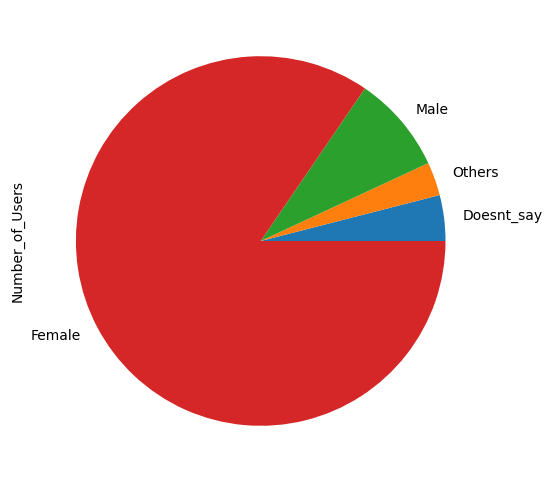

In [109]:
plt.figure(figsize=(10,6))
df_sex_unique.Number_of_Users.plot(kind='pie')

## Categorizing entries on the basis of trackable type:

In [112]:
df_original.trackable_type.value_counts()

trackable_type
Symptom      3642279
Weather      1393806
Condition    1111517
Treatment     901820
Food          480971
Tag           445669
HBI              161
Name: count, dtype: int64

<Axes: ylabel='trackable_type'>

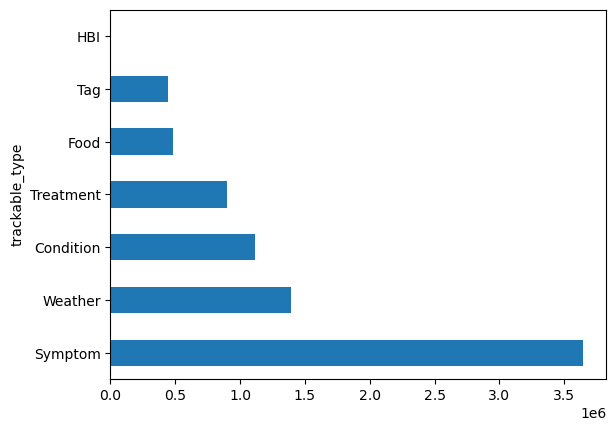

In [114]:
df_original.trackable_type.value_counts().plot(kind='barh')

## Symptoms

In [136]:
print("The total numer of unique symptoms ('trackable_name') tracked is",df_original[df_original.trackable_type=="Symptom"].trackable_name.nunique())

The total numer of unique symptoms ('trackable_name') tracked is 23157


In [119]:
df_original[df_original.trackable_type=="Symptom"].trackable_name.value_counts().head(10)  # Top 10 different symptoms traced

trackable_name
Headache                 108550
Fatigue                  107512
Nausea                    89520
Brain fog                 73175
Joint pain                64936
Fatigue and tiredness     63395
Anxiety                   61545
Diarrhea                  52418
Dizziness                 50150
Depression                43370
Name: count, dtype: int64

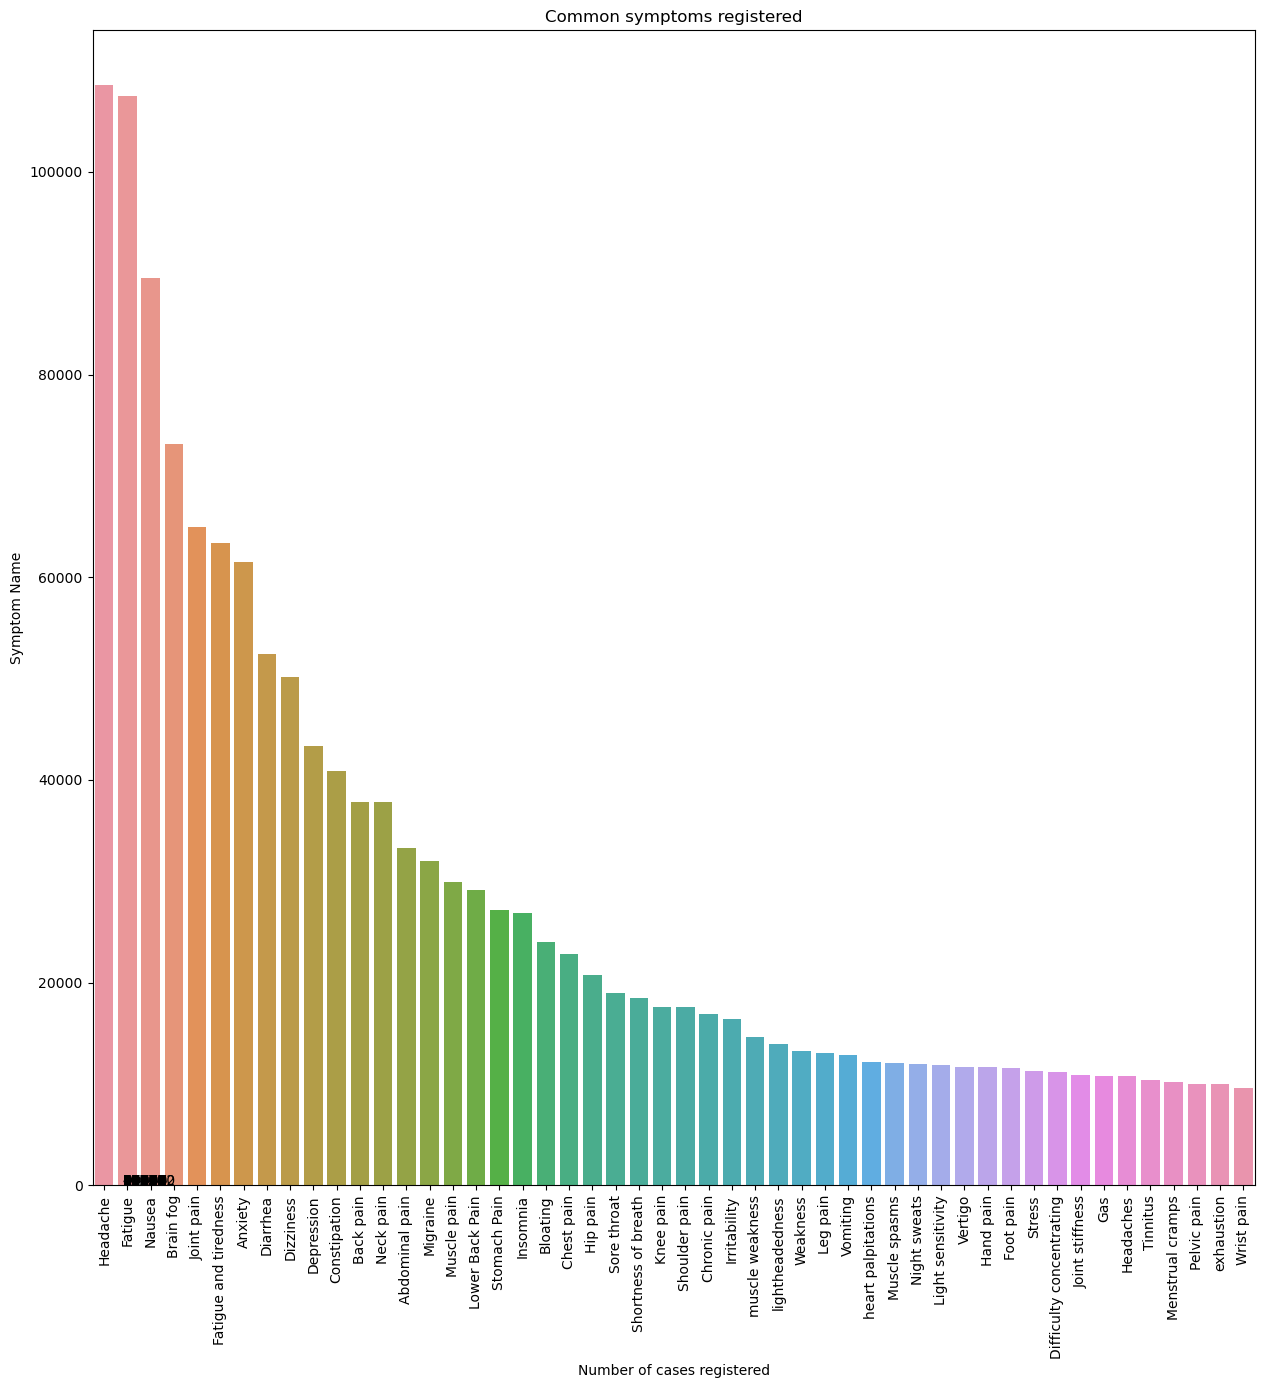

In [123]:
plt.figure(figsize=(15,15))
sector_name = df_original[df_original.trackable_type=="Symptom"].trackable_name.value_counts().iloc[0:50]
sns.barplot(x=sector_name.index, y=sector_name.values)  # Specify x and y values using x and y parameters
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xticks(rotation='vertical')
plt.xlabel('Number of cases registered')
plt.ylabel('Symptom Name')
plt.title("Common symptoms registered")
plt.show()

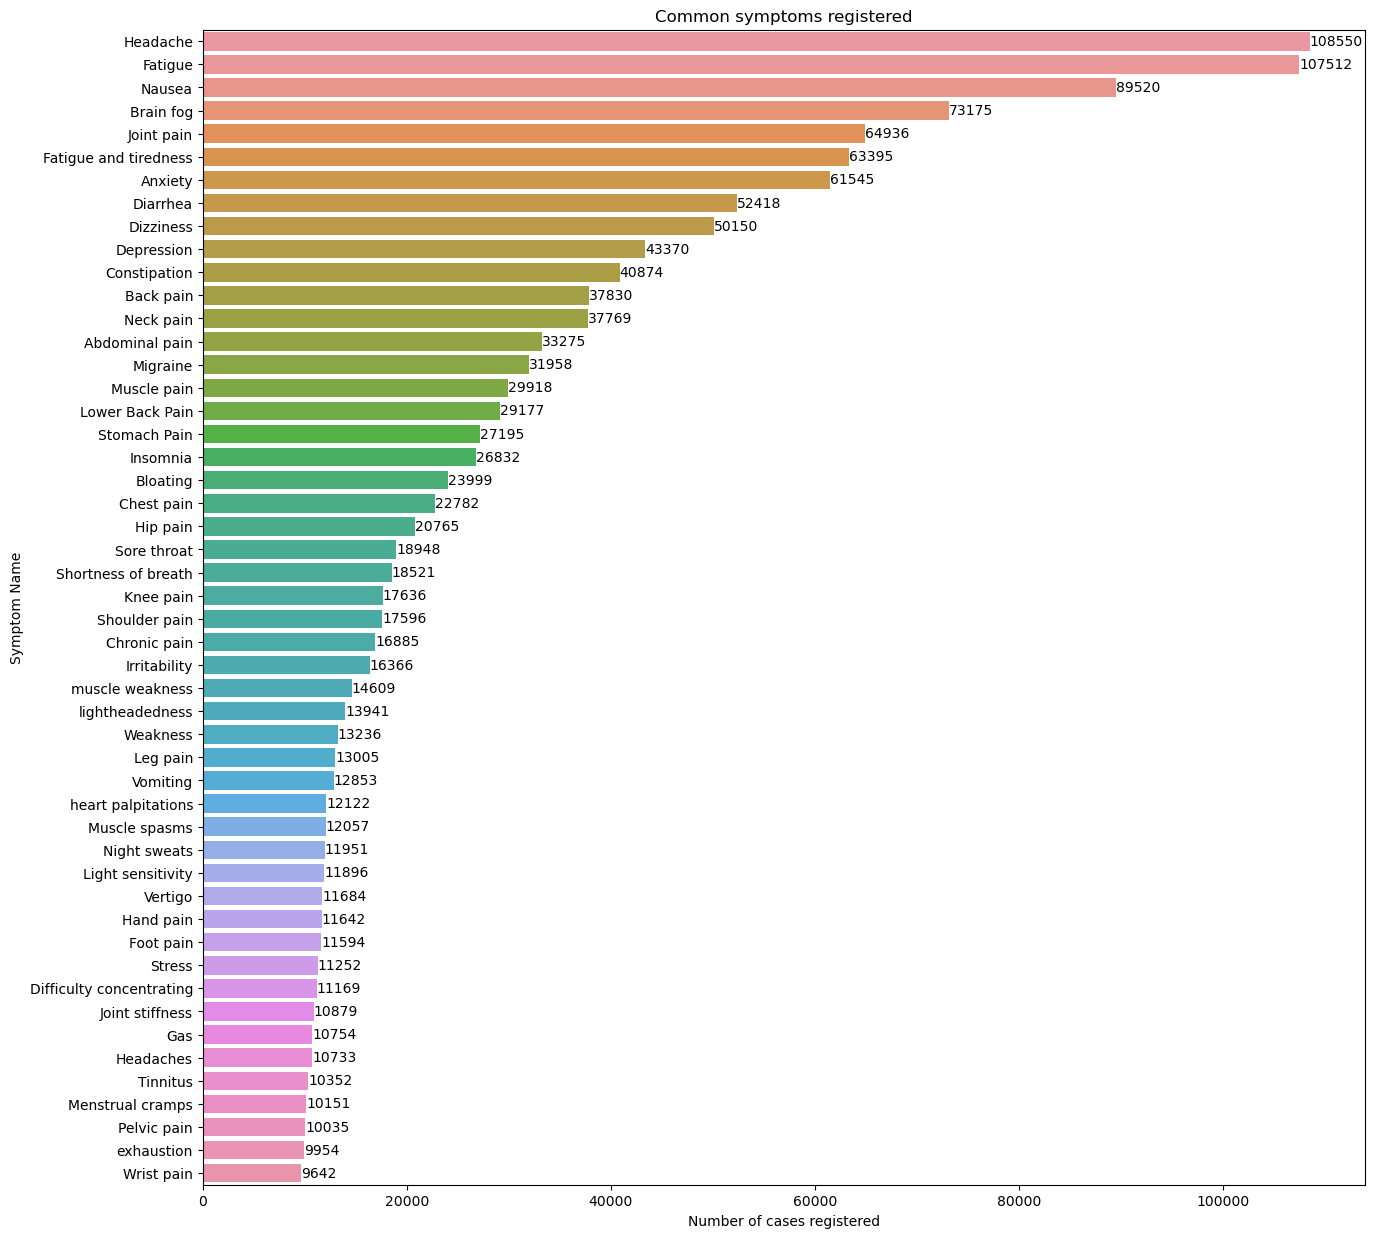

In [125]:
plt.figure(figsize=(15,15))
sector_name = df_original[df_original.trackable_type=="Symptom"].trackable_name.value_counts().iloc[0:50]
sns.barplot(x=sector_name.values, y=sector_name.index)  # Specify x and y values with x and y parameters swapped
for i, v in enumerate(sector_name.values):
    plt.text(v, i, str(v), color='k', fontsize=10, ha='left', va='center')  # Adjust text position for horizontal bar chart
plt.xlabel('Number of cases registered')
plt.ylabel('Symptom Name')
plt.title("Common symptoms registered")
plt.show()

In [127]:
df1 = df_original.set_index(['user_id', 'age'])
df1.head()

sex country checkin_date trackable_id trackable_type  \
user_id age                                                             
9070    NaN      NaN     NaN   2015-11-26         1069      Condition   
22737   32.0    male      US   2015-11-26         1069      Condition   
376     2.0   female      CA   2017-04-28         3168      Condition   
        2.0   female      CA   2017-04-28         3169      Condition   
        2.0   female      CA   2017-04-28         3170      Condition   

                                                 trackable_name  \
user_id age                                                       
9070    NaN                                  Ulcerative colitis   
22737   32.0                                 Ulcerative colitis   
376     2.0   pain in left upper arm felt like i was getting...   
        2.0                             hip pain when gettin up   
        2.0                                 pain in hand joints   

             trackable_value  
user_id age                   
9070    NaN                0  
22737   32.0               0  
376     2.0                4  
        2.0                3  
        2.0                4

In [129]:
df1[df1.trackable_type == "Symptom"].trackable_name.head()


user_id  age 
376      2.0     Joint stiffness
17088    NaN              Nausea
         NaN              Nausea
         NaN             Anxiety
         NaN             Fatigue
Name: trackable_name, dtype: object

## Treatments

In [131]:
df1[df1.trackable_type == "Treatment"].head(10)


sex country checkin_date trackable_id trackable_type  \
user_id age                                                             
17088   NaN      NaN     NaN   2015-05-26         9890      Treatment   
        NaN      NaN     NaN   2015-05-27         9890      Treatment   
        NaN      NaN     NaN   2015-05-27         4934      Treatment   
1451    37.0  female      US   2015-05-26         1470      Treatment   
        37.0  female      US   2015-05-26         5681      Treatment   
        37.0  female      US   2015-05-26         7404      Treatment   
        37.0  female      US   2015-05-27         1470      Treatment   
        37.0  female      US   2015-05-27         5681      Treatment   
27923   42.0    male      CL   2015-05-25         4618      Treatment   
20522   33.0  female      US   2015-12-08         2493      Treatment   

             trackable_name trackable_value  
user_id age                                  
17088   NaN          Zofran          8.0 mg  
        NaN          Zofran          4.0 mg  
        NaN        Klonopin          0.5 mg  
1451    37.0       Caffeine        100.0 mg  
        37.0      Methadone         20.0 mg  
        37.0       Provigil        56.25 mg  
        37.0       Caffeine        100.0 mg  
        37.0      Methadone         10.0 mg  
27923   42.0   Indomethacin     2 x 25.0 mg  
20522   33.0       Curcumin         47.5 mg

## Exploring weather effects

In [138]:
print("There are a total of ",df_original[df_original.trackable_type=="Weather"].trackable_name.nunique()," unique weather conditions")

There are a total of  6  unique weather conditions


In [140]:
df_original[df_original.trackable_type=="Weather"].trackable_name.value_counts()


trackable_name
icon                232301
temperature_min     232301
temperature_max     232301
precip_intensity    232301
pressure            232301
humidity            232301
Name: count, dtype: int64

### Temperature

In [142]:
df_original[df_original.trackable_name=="temperature_min"].head()


user_id   age     sex country checkin_date trackable_id trackable_type  \
17       376   2.0  female      CA   2017-04-28         9363        Weather   
451    19993  33.0  female      US   2017-11-01        37338        Weather   
460    19993  33.0  female      US   2018-12-29       147518        Weather   
916     5075  50.0  female      US   2017-03-16         5209        Weather   
922     5075  50.0  female      US   2017-03-15         5210        Weather   

      trackable_name trackable_value  
17   temperature_min            54.0  
451  temperature_min            30.0  
460  temperature_min            22.0  
916  temperature_min            52.0  
922  temperature_min            46.0

In [146]:
s_max = df_original[df_original.trackable_name=="temperature_max"].trackable_value
s_min = df_original[df_original.trackable_name=="temperature_min"].trackable_value

In [148]:
max_temp = pd.to_numeric(s_max, errors='coerce')
min_temp = pd.to_numeric(s_min, errors='coerce')

In [150]:
max_temp.describe()


count    232301.000000
mean         64.854288
std          18.754588
min         -21.000000
25%          51.000000
50%          67.000000
75%          80.000000
max         119.000000
Name: trackable_value, dtype: float64

In [152]:
print (("Average maximum temperature recorded is") ,max_temp.describe()['mean'] )


Average maximum temperature recorded is 64.85428818644776


In [154]:
print (("Average mimimun temperature recorded is") ,min_temp.describe()['mean'] )


Average mimimun temperature recorded is 48.00992247127649


### Pressure

In [144]:
df_original[df_original.trackable_name=="pressure"].head()


user_id   age     sex country checkin_date trackable_id trackable_type  \
20       376   2.0  female      CA   2017-04-28         9363        Weather   
454    19993  33.0  female      US   2017-11-01        37338        Weather   
463    19993  33.0  female      US   2018-12-29       147518        Weather   
919     5075  50.0  female      US   2017-03-16         5209        Weather   
925     5075  50.0  female      US   2017-03-15         5210        Weather   

    trackable_name trackable_value  
20        pressure          1012.0  
454       pressure          1005.0  
463       pressure          1020.0  
919       pressure          1023.0  
925       pressure          1026.0

In [156]:
#Pressure description
pd.to_numeric(df_original[df_original.trackable_name=="pressure"].trackable_value, errors='coerce').describe()

count    232301.000000
mean       1016.427583
std           7.600215
min         938.000000
25%        1012.000000
50%        1016.000000
75%        1021.000000
max        1051.000000
Name: trackable_value, dtype: float64

### Humidity

In [158]:
#Humidity description
pd.to_numeric(df_original[df_original.trackable_name=="humidity"].trackable_value, errors='coerce').describe()

count    232334.000000
mean         70.817625
std          15.379442
min           1.000000
25%          63.000000
50%          73.000000
75%          82.000000
max         100.000000
Name: trackable_value, dtype: float64

In [160]:
#Precipitation Intensity
pd.to_numeric(df_original[df_original.trackable_name=="precip_intensity"].trackable_value, errors='coerce').describe()

count    232096.000000
mean          0.004591
std           0.013581
min           0.000000
25%           0.000100
50%           0.000500
75%           0.003700
max           1.098300
Name: trackable_value, dtype: float64

## Types of conditions affecting users

In [162]:
print("There are a total of ",df_original[df_original.trackable_type=="Condition"].trackable_name.nunique()," unique conditions")

There are a total of  9443  unique conditions


In [164]:
df_original[df_original.trackable_type=="Condition"].trackable_name.value_counts().head(10)


trackable_name
Fibromyalgia                55255
Depression                  50109
Anxiety                     46968
Chronic fatigue syndrome    28259
Migraine                    26082
IBS                         17324
Fatigue                     14920
Asthma                      14218
Endometriosis               13873
Ehlers-Danlos syndrome      13677
Name: count, dtype: int64

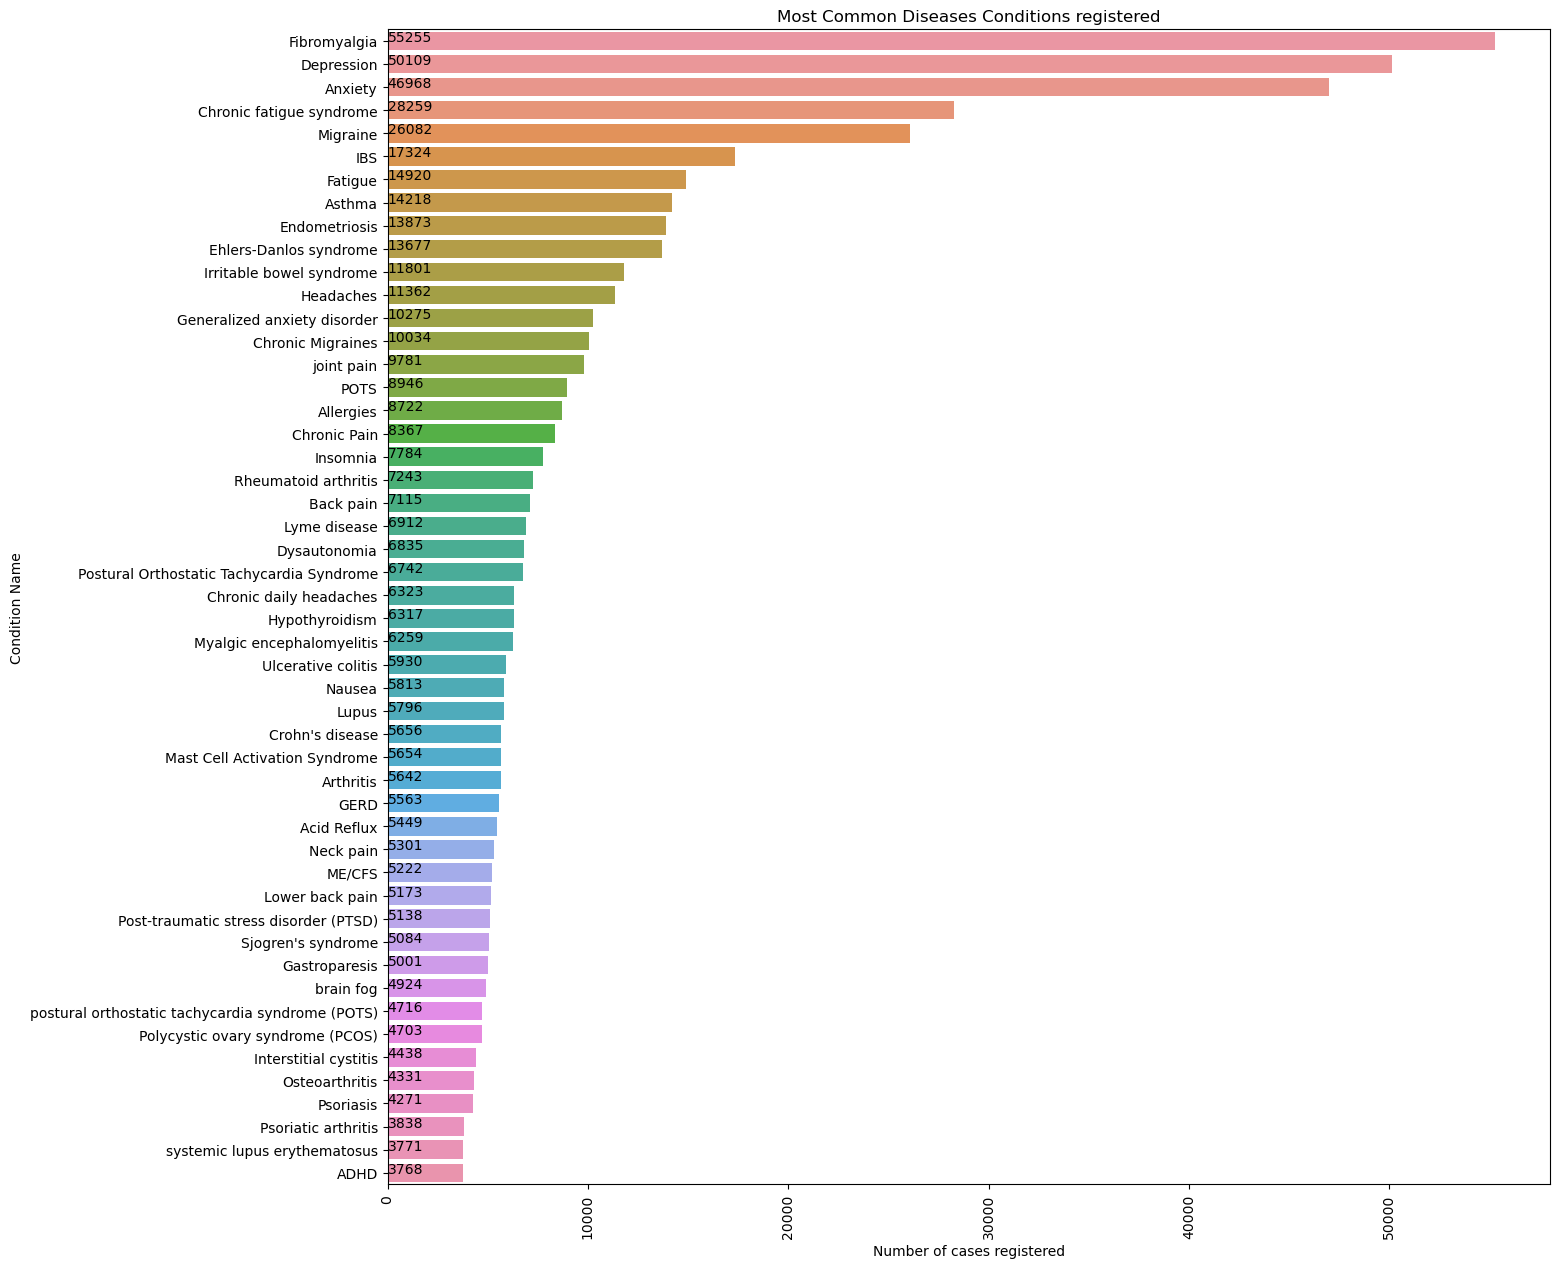

In [166]:
plt.figure(figsize=(15,15))
sector_name = df_original[df_original.trackable_type=="Condition"].trackable_name.value_counts().iloc[0:50]
sns.barplot(x=sector_name.values, y=sector_name.index)  # Specify x and y values with x and y parameters swapped
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xticks(rotation='vertical')
plt.xlabel('Number of cases registered')
plt.ylabel('Condition Name')
plt.title("Most Common Diseases Conditions registered")
plt.show()

## Types of treatments used

In [170]:
print("There are a total of ",df_original[df_original.trackable_type=="Treatment"].trackable_name.nunique()," unique treatments")

There are a total of  8154  unique treatments


In [172]:
df_original[df_original.trackable_type=="Treatment"].trackable_name.value_counts().head(10)


trackable_name
Ibuprofen      21484
Magnesium      11417
Paracetamol    11253
Vitamin D3     11168
Vitamin d       9867
Gabapentin      9627
Tramadol        9278
Prednisone      8309
Naproxen        8211
Omeprazole      7552
Name: count, dtype: int64

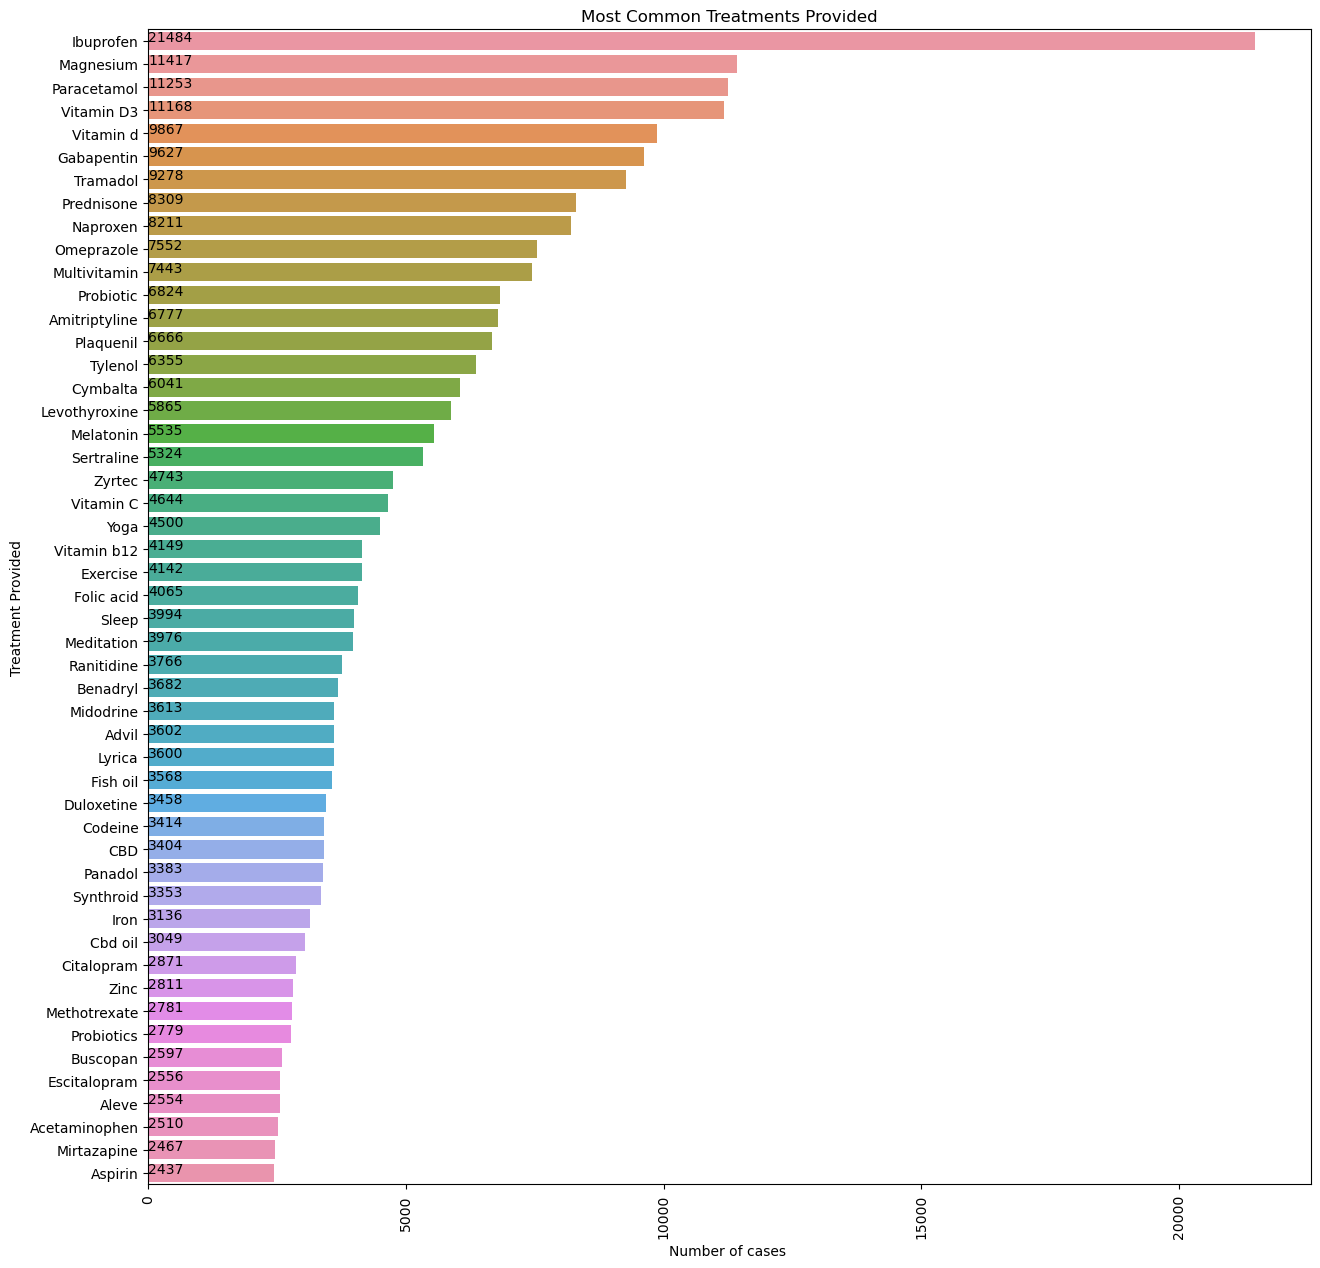

In [174]:
plt.figure(figsize=(15,15))
sector_name = df_original[df_original.trackable_type=="Treatment"].trackable_name.value_counts().iloc[0:50]
sns.barplot(x=sector_name.values, y=sector_name.index)  # Specify x and y values with x and y parameters swapped
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xticks(rotation='vertical')
plt.xlabel('Number of cases ')
plt.ylabel('Treatment Provided')
plt.title("Most Common Treatments Provided")
plt.show()

## Tags

In [203]:
print("There are a total of ",df_original[df_original.trackable_type=="Tag"].trackable_name.nunique()," unique tags")

There are a total of  34253  unique tags


In [207]:
df_original[df_original.trackable_type=="Tag"].trackable_name.value_counts().head(10)


trackable_name
tired            57084
stressed         30560
walked           18448
good sleep       14853
ate breakfast    14770
period           14709
dairy             8234
alcohol           8172
had sex           6661
gluten            6394
Name: count, dtype: int64

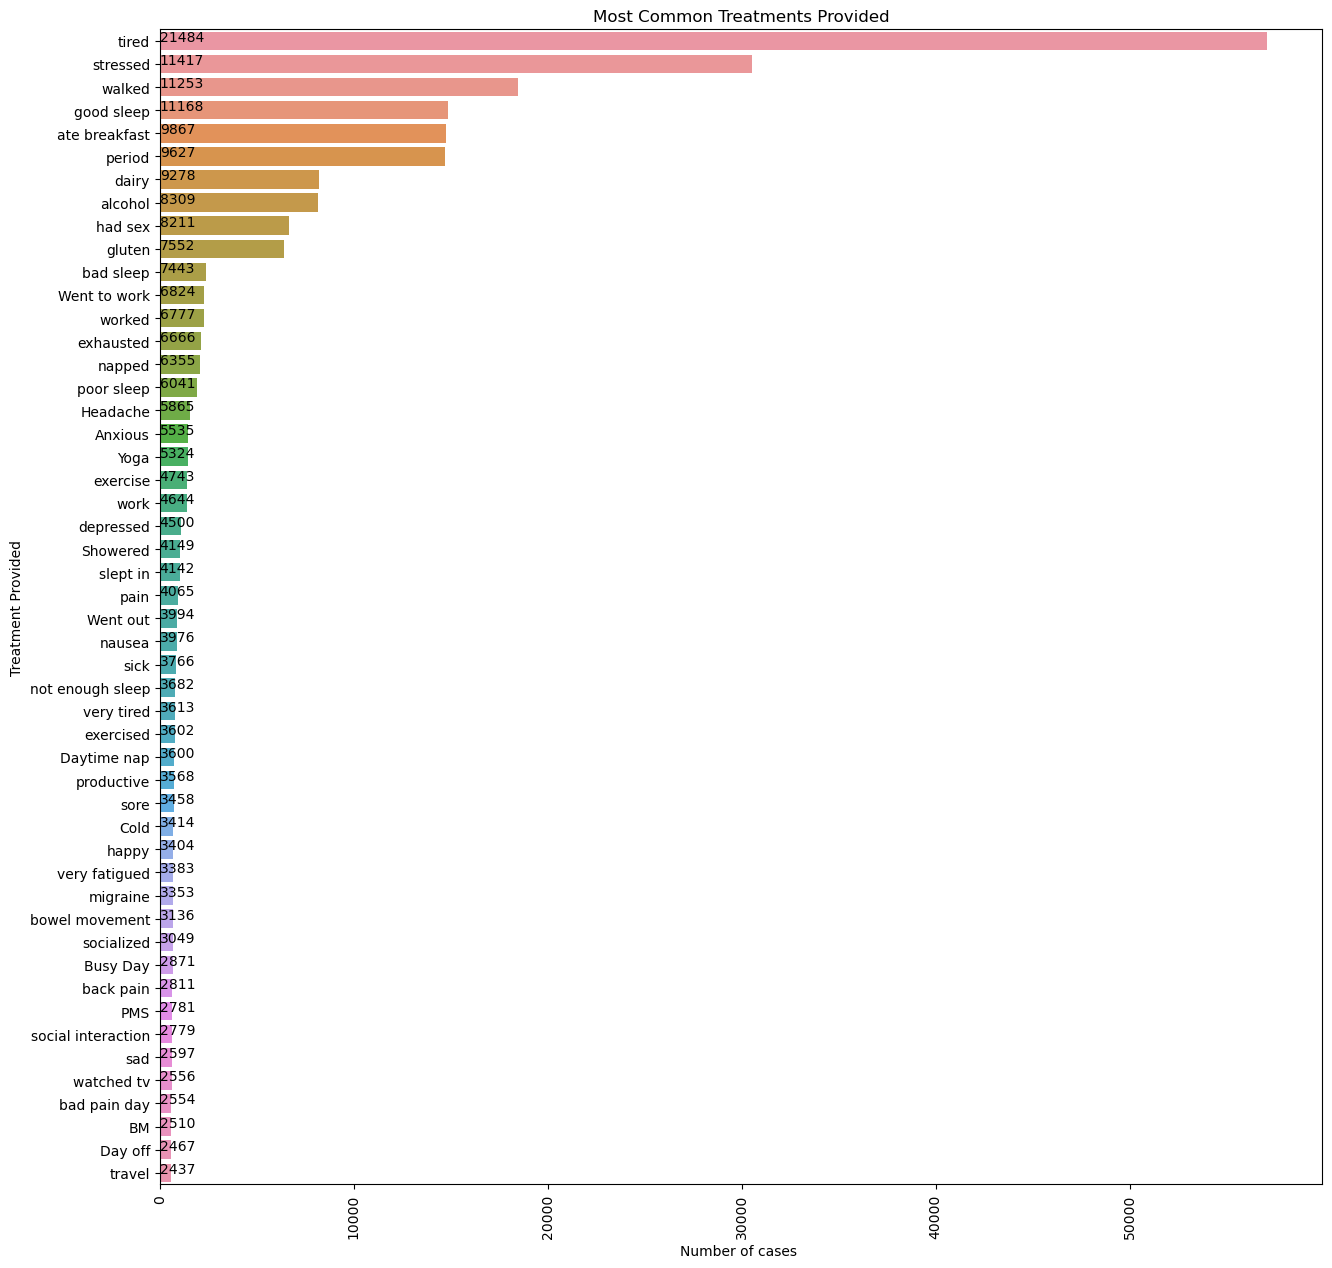

In [209]:
plt.figure(figsize=(15,15))
name = df_original[df_original.trackable_type=="Tag"].trackable_name.value_counts().iloc[0:50]
sns.barplot(x=name.values, y=name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xticks(rotation='vertical')
plt.xlabel('Number of cases ')
plt.ylabel('Treatment Provided')
plt.title("Most Common Treatments Provided")
plt.show()

In [215]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
  

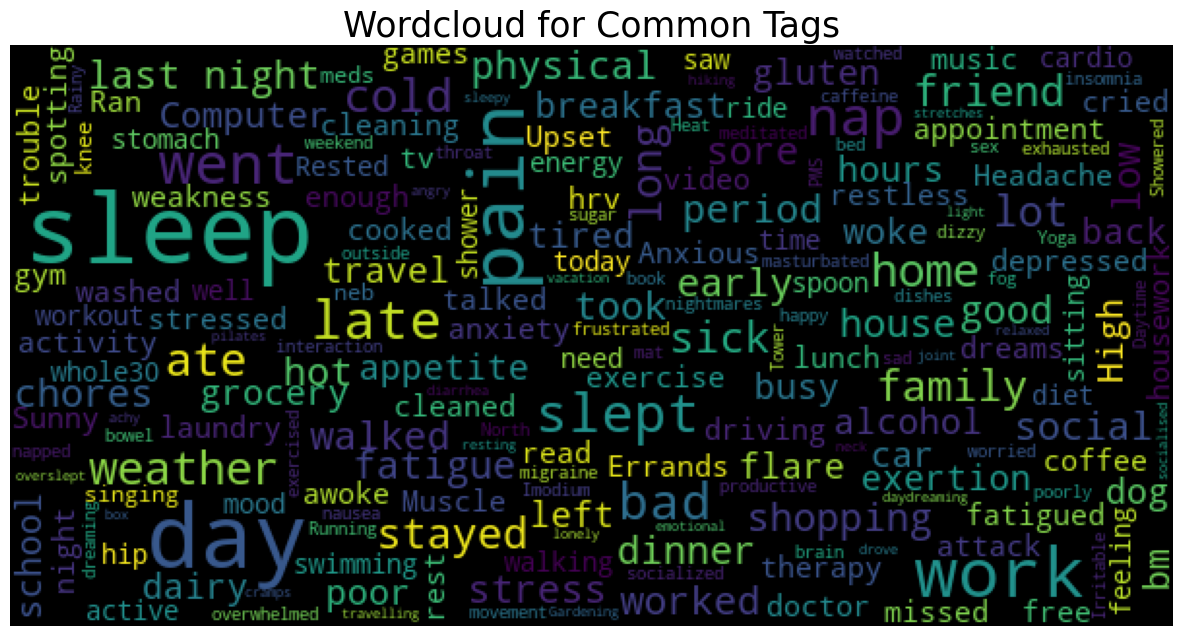

In [217]:
from wordcloud import WordCloud

names = df_original[df_original.trackable_type=="Tag"].trackable_name.value_counts().iloc[0:500].index
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.title("Wordcloud for Common Tags", fontsize=25)
plt.axis("off")
plt.show() 

## Food habits

In [222]:
print("The total numer of unique Foods is",df_original[df_original.trackable_type=="Food"].trackable_name.nunique())

The total numer of unique Foods is 46340


In [224]:
df_original[df_original.trackable_type=="Food"].trackable_name.value_counts().head(10)


trackable_name
coffee       29129
water        24583
tea          14429
Chocolate    10733
milk          9852
sugar         9480
chicken       8614
banana        7699
pizza         6797
salad         6510
Name: count, dtype: int64

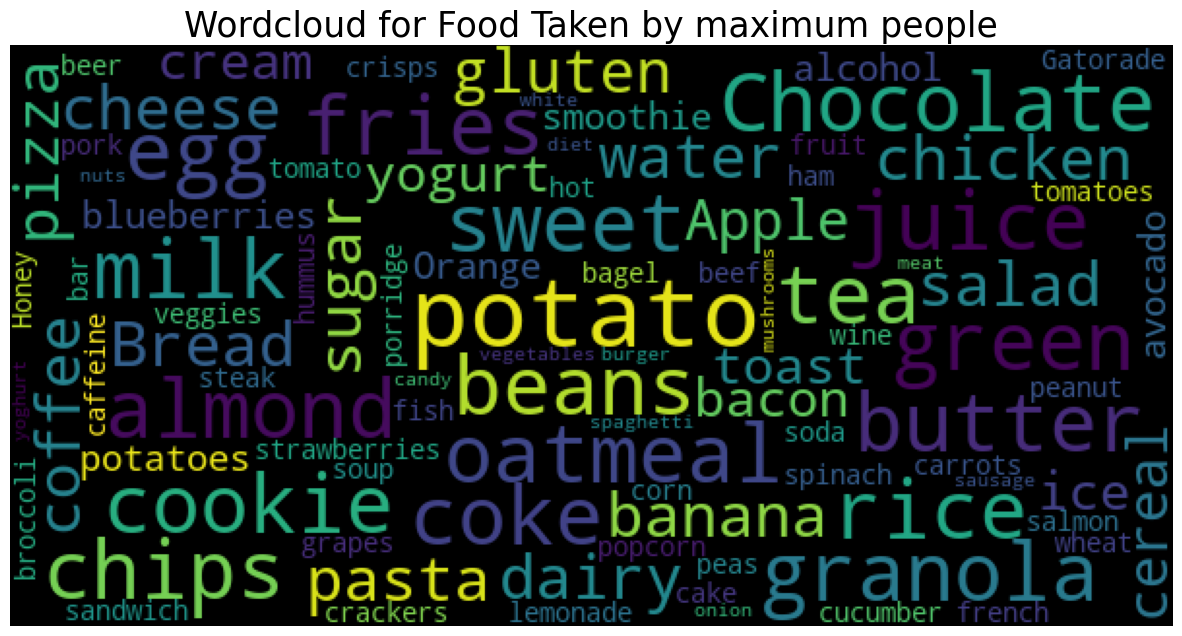

In [226]:
from wordcloud import WordCloud

names = df_original[df_original.trackable_type=="Food"].trackable_name.value_counts().iloc[0:100].index
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Food Taken by maximum people", fontsize=25)
plt.axis("off")
plt.show() 